In [317]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cm
import pandas as pd
import matplotlib.ticker as ticker
#from multimethod import multimethod
from dataclasses import dataclass
import sys as sys

jpac_blue   = "#1F77B4"; jpac_red    = "#D61D28";
jpac_green  = "#2CA02C"; jpac_orange = "#FF7F0E";
jpac_purple = "#9467BD"; jpac_brown  = "#8C564B";
jpac_pink   = "#E377C2"; jpac_gold   = "#BCBD22";
jpac_aqua   = "#17BECF"; jpac_grey   = "#7F7F7F";

jpac_color = [jpac_blue, jpac_red, jpac_green, 
              jpac_orange, jpac_purple, jpac_brown,
              jpac_pink, jpac_gold, jpac_aqua, jpac_grey, 'black' ];

jpac_axes = jpac_color[10]
dashes = 60*'-'


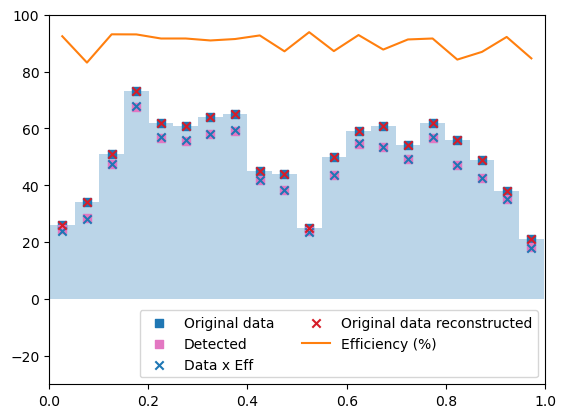

In [18]:
def doblegausiana(m1,s1,m2,s2,x):
    return np.exp(-(x-m1)**2/2/s1**2)/np.sqrt(2*np.pi)/s1/2 +  np.exp(-(x-m2)**2/2/s2**2)/np.sqrt(2*np.pi)/s2/2

def doblegausianarandom(m1,s1,m2,s2,n):
    salida = np.zeros(n)
    count  = 0
    while count<n:
        r1 = rng.uniform(0, 1, 1)
        r2 = rng.uniform(0, 1.5, 1)
        if r2[0]<doblegausiana(m1,s1,m2,s2,r1[0]):
            salida[count] = r1[0]
            count += 1
    return salida

def responsematrix(n):
    p = rng.uniform(0.01, 0.02, n*n).reshape(n,n)/n
    pdiag = rng.uniform(0.8, 0.95, n)
    k = 0
    for i in range(n):
        p[i,i] = pdiag[k]
        k += 1
    return p

def efficiency(p):
    return p.sum(axis=0)

rng = np.random.default_rng(seed=196)

xplot = np.linspace(0,1,100)
n, nbins = 1000, 20
mu1, sigma1 = 0.25, 0.15
mu2, sigma2 = 0.75, 0.15
fy = doblegausianarandom(mu1,sigma1,mu2,sigma2,n)
mu, bins, ignore = plt.hist(fy, nbins, density=False,color=jpac_color[0],alpha=0.3)
R   = responsematrix(nbins)
nu  = np.transpose(R.dot(mu))
eff = efficiency(R)
Rinv = np.linalg.inv(R)
mu_rec  = Rinv.dot(nu)
ybins = [(bins[i+1]+bins[i])/2 for i in range(len(bins)-1)]
plt.ylim(-30,100)
plt.xlim(0,1)
plt.scatter(ybins,mu,c=jpac_color[0],marker='s',label='Original data')
plt.scatter(ybins,nu,c=jpac_color[6],marker='s',label='Detected')
plt.scatter(ybins,mu*eff,marker='x',c=jpac_color[0],label='Data x Eff')
plt.scatter(ybins,mu_rec,marker='x',c=jpac_color[1],label='Original data reconstructed')
plt.plot(ybins,100*eff,c=jpac_color[3],label='Efficiency (%)')
plt.legend(loc='lower right',ncol=2,frameon=True)
plt.show()


In [24]:
def scope_test():
    def do_local():
        spam = "local spam"

    def do_nonlocal():
        nonlocal spam
        spam = "nonlocal spam"

    def do_global():
        global spam
        spam = "global spam"

    spam = "test spam"
    do_local()
    print("After local assignment:", spam)
    do_nonlocal()
    print("After nonlocal assignment:", spam)
    do_global()
    print("After global assignment:", spam)

scope_test()
print("In global scope:", spam)


After local assignment: test spam
After nonlocal assignment: nonlocal spam
After global assignment: nonlocal spam
In global scope: global spam


In [281]:
def variable_args(a,*args, **kwargs):
    print('args is', args)
    print('kwargs is', kwargs)
    print(args[0])
    print(kwargs['x'])

variable_args(2, 5, x=1, y=2, z=3)

args is (5,)
kwargs is {'x': 1, 'y': 2, 'z': 3}
5
1


In [406]:
class DataProcessing:
    """Pseudodata generation"""
    """ Options: boostrap, original_bootstrap, jackknife (leave-one-out), cross-validation"""
    import numpy as np
    from scipy.stats import norm, uniform, gamma, vonmises
    def __init__(self, datakind, xdata,ydata, unc_xdata=[None], unc_ydata=[None]):
        self.ndata = self.np.array([len(xdata), len(ydata), len(datakind)]).min()
        self.datakind = datakind[0:self.ndata]
        self.xdata = xdata[0:self.ndata]
        self.ydata = ydata[0:self.ndata]
        if unc_xdata[0] == None:
            self.unc_xdata = self.np.zeros(self.ndata)
        else:
            self.unc_xdata = unc_xdata[0:self.ndata]
        if unc_ydata[0] == None:
            self.unc_ydata = self.np.zeros(self.ndata)
        else:
            self.unc_ydata = unc_ydata[0:self.ndata]

    """Gaussian bootstrap for different distributions """
    def bootstrap(self, nbootstraps=10000, distribution='gaussian', axis='y'):
        tabla = (distribution, axis)
        if tabla == ('gaussian','y'): 
            self.resampled = self.np.array([self.norm(self.ydata[i], self.unc_ydata[i]).rvs(nbootstraps) for i in range(self.ndata) ] )
        elif tabla == ('gaussian','x'):
            self.resampled = self.np.array([self.norm(self.xdata[i], self.unc_xdata[i]).rvs(nbootstraps) for i in range(self.ndata) ] )
        elif tabla == ('uniform','y'):
            self.resampled = self.np.array([self.uniform(loc=self.ydata[i] \
                            - self.unc_ydata[i], scale=2*self.unc_ydata[i]).rvs(nbootstraps) for i in range(self.ndata) ] )
        elif tabla == ('uniform','x'):
            self.resampled = self.np.array([self.uniform(loc=self.xdata[i] \
                            - self.unc_xdata[i], scale=2*self.unc_xdata[i]).rvs(nbootstraps) for i in range(self.ndata) ] )
        elif tabla == ('vonmises','x'):
            print('In the works')
            self.resampled = ['In the works']
        elif tabla == ('vonmises','y'):
            print('In the works')
            self.resampled = ['In the works']
        elif tabla == ('gamma','x'):
            print('In the works')
            self.resampled = ['In the works']
        elif tabla == ('gamma','x'):
            print('In the works')
            self.resampled = ['In the works']
        return self.resampled

    """Original bootstrap as defined by Efron and Tibshirani. Requires a fit to the data """
    def original_bootstrap(self, best, nbootstraps=10000, distribution='gaussian', axis='y'):
        if axis == 'y':
            self.unc_ydata = self.np.absolute(self.np.array(self.ydata) - self.np.array(best))
        elif axis == 'x':
            self.unc_xdata = self.np.absolute(self.np.array(self.xdata) - self.np.array(best))
        self.resampled = self.bootstrap(nbootstraps, distribution, axis)
        return self.resampled

    """Leave-one-out resampling"""
    def leave_one_out(self):
        self.xresampled = self.np.array([self.np.array(self.xdata[:index]).tolist() \
                                         + self.np.array(self.xdata[index+1:]).tolist() for index in range(self.ndata)])
        self.yresampled = self.np.array([self.np.array(self.ydata[:index]).tolist() \
                                         + self.np.array(self.ydata[index+1:]).tolist() for index in range(self.ndata)])
        self.datakindresampled = [self.datakind[:index] + self.datakind[index+1:] for index in range(self.ndata)]
        return self.datakindresampled, self.xresampled, self.yresampled

    """Jackknife (alias for the leave-one-out resampling)"""
    def jackknife(self,nout=1):
        if nout == 1:
            return self.leave_one_out()
        else:
            self.xresampled = ['Not coded']
            self.yresampled = ['Not coded']
            self.datakindresampled = ['Not coded']

    """Create a cross-validation set"""
    def cross_validation(self,pct=0.8):
        listAll = self.np.arange(self.ndata)
        self.indicesfit = self.np.random.choice(listAll, int(self.ndata*pct),replace=False)
        self.indicescv  = np.array(list(set(listAll)- set(self.indicesfit)))
        self.datakindfit = self.np.take(self.datakind, self.indicesfit, axis=0)
        self.xdatafit = self.np.take(self.xdata, self.indicesfit, axis=0)
        self.ydatafit = self.np.take(self.xdata, self.indicesfit, axis=0)
        self.unc_xdatafit = self.np.take(self.unc_xdata, self.indicesfit, axis=0)
        self.unc_ydatafit = self.np.take(self.unc_ydata, self.indicesfit, axis=0)
        self.datakindcv = self.np.take(self.datakind, self.indicescv, axis=0)
        self.xdatacv = self.np.take(self.xdata, self.indicescv, axis=0)
        self.ydatacv = self.np.take(self.xdata, self.indicescv, axis=0)
        self.unc_xdatacv = self.np.take(self.unc_xdata, self.indicescv, axis=0)
        self.unc_ydatacv = self.np.take(self.unc_ydata, self.indicescv, axis=0)
        return self.datakindfit, self.xdatafit, self.ydatafit, self.datakindcv, self.xdatacv, self.ydatacv


In [404]:
xdata = np.array([0, 1, 2, 3, 4])
ydata = np.array([0, 2, 4, 6, 8])
unc_ydata = np.array([1, 1, 1, 1, 1])
best = np.array([0.1, 1.9, 4.1, 6.2, 7.7])
kdata = ['A', 'B', 'C', 'D', 'E']
x = DataProcessing(datakind=kdata, ydata=ydata, xdata=xdata, unc_ydata=unc_ydata)

In [326]:
x.bootstrap(distribution='uniform', nbootstraps=3)
x.resampled

array([[ 0.13946985, -0.67853531,  0.98502196],
       [ 2.84472459,  2.93360792,  1.69431346],
       [ 3.10875127,  3.31371207,  4.20589272],
       [ 5.60686059,  5.39218141,  5.4457605 ],
       [ 8.74289091,  7.52472052,  7.17742429]])

In [327]:
x.original_bootstrap(best, distribution='uniform', nbootstraps=2)
x.resampled

array([[-6.09365982e-03,  4.48011339e-03],
       [ 1.93131925e+00,  2.07513646e+00],
       [ 4.02669411e+00,  3.99060657e+00],
       [ 6.12289173e+00,  5.85337976e+00],
       [ 7.84169631e+00,  7.85404330e+00]])

In [409]:
x.jackknife()

([['B', 'C', 'D', 'E'],
  ['A', 'C', 'D', 'E'],
  ['A', 'B', 'D', 'E'],
  ['A', 'B', 'C', 'E'],
  ['A', 'B', 'C', 'D']],
 array([[1, 2, 3, 4],
        [0, 2, 3, 4],
        [0, 1, 3, 4],
        [0, 1, 2, 4],
        [0, 1, 2, 3]]),
 array([[2, 4, 6, 8],
        [0, 4, 6, 8],
        [0, 2, 6, 8],
        [0, 2, 4, 8],
        [0, 2, 4, 6]]))

In [399]:
x.crossvalidation(0.7)
print(x.indices ,x.notindices)

[0 3 1] [2 4]


In [310]:
class ModelBuilder:
    import numpy as np
    """To build the models you want to use"""
    def __init__(self,a):
        self.a = a

    def modelo(x,npolos,npol,*args):
        [ args[i]/x for i in range(npolos) ]
        return 

In [318]:
print (sys.version) 

3.9.15 | packaged by conda-forge | (main, Nov 22 2022, 08:50:29) 
[Clang 14.0.6 ]
